In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.style
matplotlib.style.use('bmh')
from matplotlib.pylab import rcParams
import seaborn as sns
from IPython.display import display

#Time series and ML modules
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#!pip install numpy==1.23.5 pmdarima==2.0.2

In [ ]:
from pmdarima import auto_arima
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from calendar import day_name
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

In [ ]:
ticket_df = pd.read_csv('/cinemaTicket_Ref.csv')
ticket_df.head(10)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.98,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.69,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.57,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.95,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.55,150000.000000,4,258.064516,2018-05-05,5,2,5


In [ ]:
ticket_df.info()
ticket_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


(142524, 14)

In [ ]:
ticket_df.describe(include='all')

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524,142524.000000,142524.000000,142524.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-15,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,790,NaN,NaN,NaN
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,NaN,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,NaN,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,NaN,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,NaN,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,NaN,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,NaN,9.000000,3.000000,24.000000


In [ ]:
ticket_df.isnull().sum()

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,125
ticket_price,0
ticket_use,0
capacity,125


In [ ]:
pd.DataFrame(data = [ticket_df.isna().sum()/ticket_df.shape[0]*100],
             index=["Null (%)"]).T.style.background_gradient(cmap='summer_r')
ticket_df.dropna(inplace=True)
ticket_df.isnull().sum()
#No more null values are present, so we can proceed.

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,0
ticket_price,0
ticket_use,0
capacity,0


In [ ]:
print(f"Dataset has {ticket_df.duplicated().sum()} duplicated data")
#dropped all duplicate rows
ticket_df.drop_duplicates(keep='first')
def duplicate(df, column):
    if len(df[df[column].duplicated()]) == 0:
        print(f'STATUS: There are no duplicate values in the column of "{column}"')
    else:
        print(f'STATUS: There are {len(df[df[column].duplicated()])} duplicate values in the column of "{column}"')

duplicate(ticket_df,'film_code')
duplicate(ticket_df,'cinema_code')

Dataset has 104 duplicated data
STATUS: There are 142351 duplicate values in the column of "film_code"
STATUS: There are 142155 duplicate values in the column of "cinema_code"


In [ ]:
ticket_df['date'] = pd.to_datetime(ticket_df["date"],errors='coerce')
cols = ['film_code','cinema_code','date']
ticket_df['id']=ticket_df[cols].apply(lambda row:'_'.join(row.values.astype(str)), axis=1)
ticket_df.head(5)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,id
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,1492_304_2018-05-05 00:00:00
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,1492_352_2018-05-05 00:00:00
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,1492_489_2018-05-05 00:00:00
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,1492_429_2018-05-05 00:00:00
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,1492_524_2018-05-05 00:00:00


In [ ]:
#Reordering the dataset and bringing the 'id' column in the front
ticket_df = ticket_df[['id'] + [a for a in ticket_df.columns if a != 'id'] ]
ticket_df.tail(5)

,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569_495_2018-11-04 00:00:00,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569_474_2018-11-04 00:00:00,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569_524_2018-11-04 00:00:00,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569_529_2018-11-04 00:00:00,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569_486_2018-11-04 00:00:00,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [ ]:
ticket_df.drop_duplicates('id',inplace=True)
duplicate(ticket_df,'id')
unique_films = ticket_df['film_code'].nunique()
unique_cinemas = ticket_df['cinema_code'].nunique()
print(f"{unique_films} unique films.")
print(f"{unique_cinemas} unique cinemas ")

STATUS: There are no duplicate values in the column of "id"
48 unique films.
244 unique cinemas 


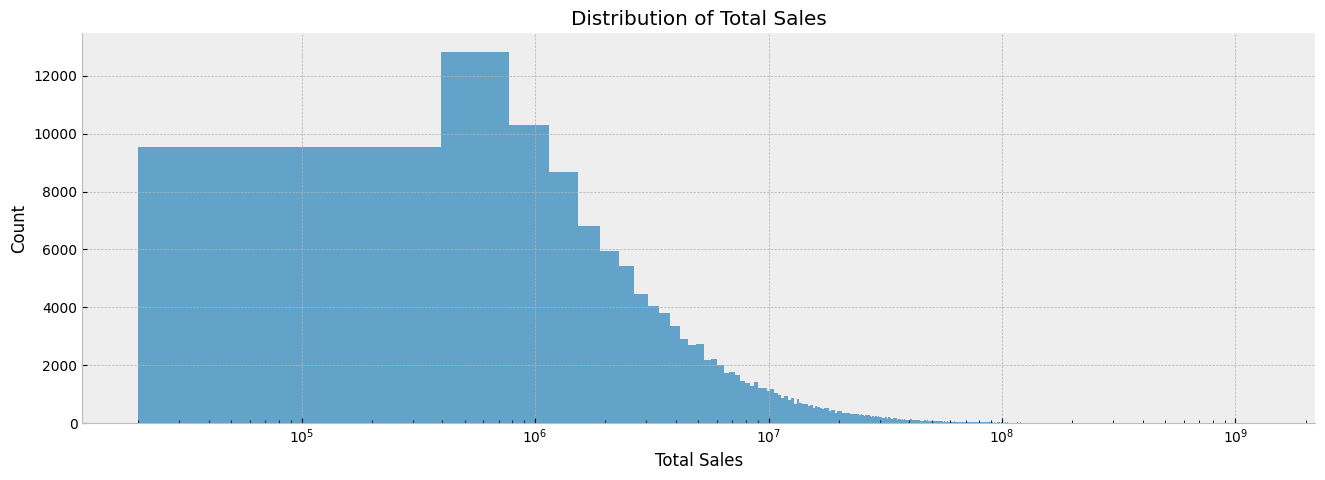

In [ ]:
#Visualizing the distribution of total_Sales
t_sales = ticket_df.total_sales.values
ax =sns.displot(t_sales)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5 ,4.5)
plt.title("Distribution of Total Sales")
plt.xlabel('Total Sales')
plt.xscale('log')
plt.show()

At first instance it seems the distribution is heavily skewed at the range of 0 to 10^8 which is a 100 million.

To understand and analyse it in a better way , I will create bins for the total_sales variable and see its distributions across the bins

Binning - It is the method of bucketing or discreting values in a large range.

In [ ]:
df_uni = ticket_df.copy()
#bins in the range of 0-100m upto 1300000000
bins = np.arange(0,1300000000,100000000)
df_uni['binned']=pd.cut(ticket_df['total_sales'],bins)

#creating a value count df with percentage of total sales in each bin
vc_df = df_uni.reset_index().groupby(['binned']).size().to_frame('count')
vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
vc_df = vc_df.reset_index()
vc_df['binned']=vc_df['binned'].astype('str')
vc_df

,binned,count,percentage (%)
0,"(0, 100000000]",139765,98.222694
1,"(100000000, 200000000]",1931,1.357049
2,"(200000000, 300000000]",347,0.243861
3,"(300000000, 400000000]",125,0.087846
4,"(400000000, 500000000]",57,0.040058
5,"(600000000, 700000000]",29,0.020380
6,"(500000000, 600000000]",28,0.019678
7,"(700000000, 800000000]",4,0.002811
8,"(800000000, 900000000]",3,0.002108
9,"(1000000000, 1100000000]",3,0.002108


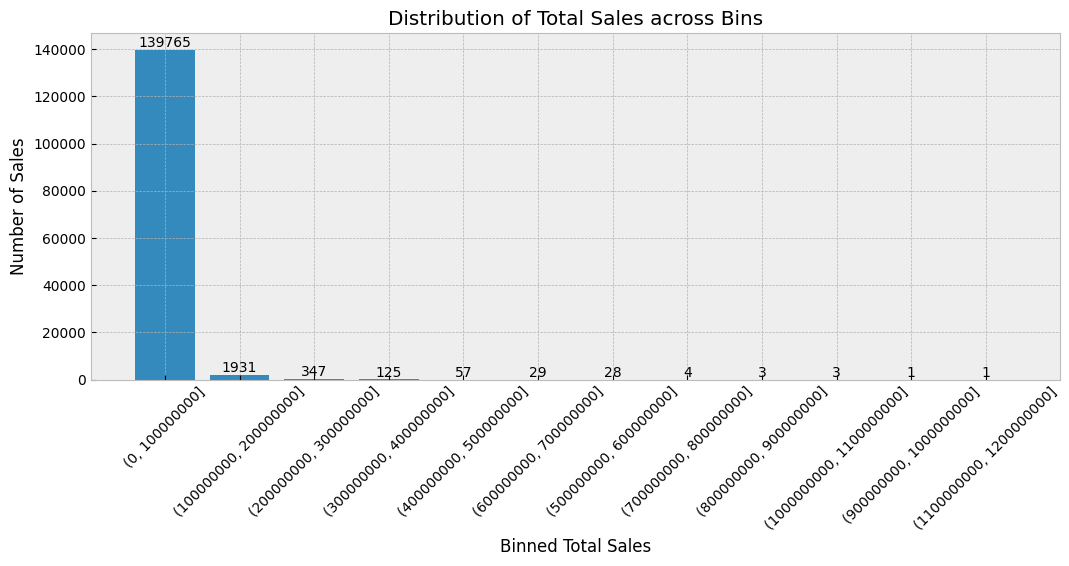

In [ ]:
#lets visualize the distributions across the bins
x = vc_df['binned'].values
y = vc_df['count'].values
plt.bar(x,y)
plt.ylabel('Number of Sales')
plt.xlabel('Binned Total Sales')
plt.title('Distribution of Total Sales across Bins')
plt.xticks(rotation=45)
# code below is for displaying the number of sales on top of the bins
for i,j in zip(x,y):
    label = "{:.1%}".format(j)
    plt.annotate(int(j),(i,j),textcoords='offset points',xytext=(0,2),ha='center',fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.show()
#Around 98% of the dataset is in the 1st bin.

As it is skewed, IQR is safe to check and use. IQR - Intequartile Range The IQR Range consists of the 50% of the population in its range. IQR * 1.5 is said to consider 99% of the population. The rest 1% is said to be considered as outliers.

The IQR can be defined as the difference between the 75th quantile and the 25th quantile. Therefore IQR = Q3 - Q1

We use this method to identify the outliers and remove them

In [ ]:
Q1 = ticket_df['total_sales'].quantile(.25) #25th quantile
print(f"The first quantile is {Q1}")
Q3 = ticket_df['total_sales'].quantile(0.75) #75th quantile
print(f"The third quantile is {Q3}")
IQR = Q3-Q1
print(f"The IQR range is {IQR}")
S = 1.5 * IQR #Threshold

#Upperbound - Anything above this is considered as an outlier
UB = Q3 + S

#Lowerbound - Anything below this is considered as an outlier
LB = Q1 - S

print(f"Valid range for Total_Sales : {LB} <= Total Sales <= {UB}")

The first quantile is 1270000.0
The third quantile is 11100000.0
The IQR range is 9830000.0
Valid range for Total_Sales : -13475000.0 <= Total Sales <= 25845000.0


Empirical Rule Also known as the 68-95-99.7 rule states that in a normal distirbution:

68% of the population lies within 1 * standard deviation of the mean up and down 95% of the population lies within 2 * standard deviation of the mean up and down 99.7% of the population lies within 3 * standard deviation of the mean up an down Anything not within these ranges is considered as an outlier



In [ ]:
mean = ticket_df['total_sales'].mean()
print(f'mean is {mean}')
std = ticket_df['total_sales'].std()
print(f'standard deviation is {std}')
if std>mean:
    print(f"standard deviation is {std/mean} higher than mean")

mean is 12338325.170870375
standard deviation is 30627056.356787674
standard deviation is 2.482270156819604 higher than mean


In [ ]:
#simple function to carry out the emperical formula
def empirical_rule(n=1 ,rt = False):
    UB = mean + (n* std)
    LB = mean - (n * std)
    if rt:
        return UB #returning Upper boundary for future use
    print(f"valid range for {n} std : {LB} <= Total Sales <= {UB}")

empirical_rule(1) #returns 1 * std range
empirical_rule(2) # returns 2 * std range
empirical_rule(3) # returns 3 * std range

valid range for 1 std : -18288731.1859173 <= Total Sales <= 42965381.527658045
valid range for 2 std : -48915787.54270497 <= Total Sales <= 73592437.88444573
valid range for 3 std : -79542843.89949264 <= Total Sales <= 104219494.2412334


In [ ]:
#Removing outliers outside the upper bound of 3 * std as they would be considered as outliers for our dataset
UB = empirical_rule(3,rt=True)
ticket_df2=ticket_df[ticket_df['total_sales']<= UB]
print(f"Filtered total sales values <= {UB}")
mean =ticket_df2['total_sales'].mean()
print(f"mean = {mean}")
std = ticket_df2['total_sales'].std()
print(f"std  = {std}")
print(f"standard deviation is {std/mean} higher than mean")
#We can see that the mean and std has reduced significantly by just filtering less than 0.15% of the values.


Filtered total sales values <= 104219494.2412334
mean = 9431057.905127015
std  = 14980741.718227105
standard deviation is 1.5884476448907296 higher than mean


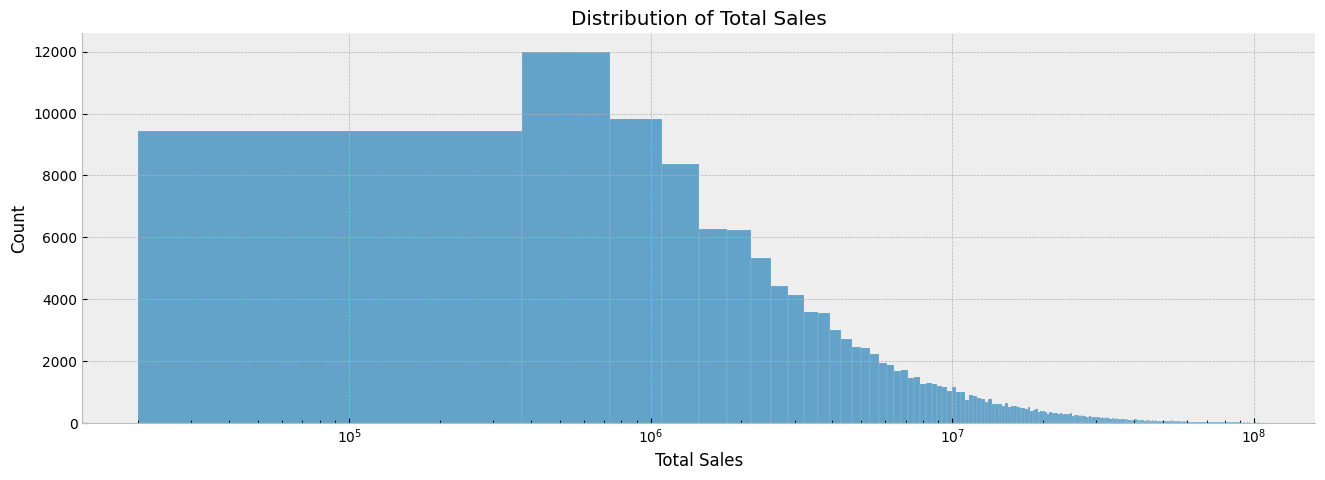

In [ ]:
#Visualizing the total sales distribution without the outliers
t_sales = ticket_df2.total_sales.values
ax =sns.displot(t_sales)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5 ,4.5)
plt.title("Distribution of Total Sales")
plt.xlabel('Total Sales')
plt.xscale('log')
plt.show()

In [ ]:
#finding the log values of total sales
ticket_df2['total_sales_log'] = np.log(ticket_df2.total_sales)
ticket_df2.head()

,id,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,total_sales_log
0,1492_304_2018-05-05 00:00:00,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,15.176487
1,1492_352_2018-05-05 00:00:00,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,15.027452
2,1492_489_2018-05-05 00:00:00,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,14.755518
3,1492_429_2018-05-05 00:00:00,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,13.997832
4,1492_524_2018-05-05 00:00:00,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,13.997832


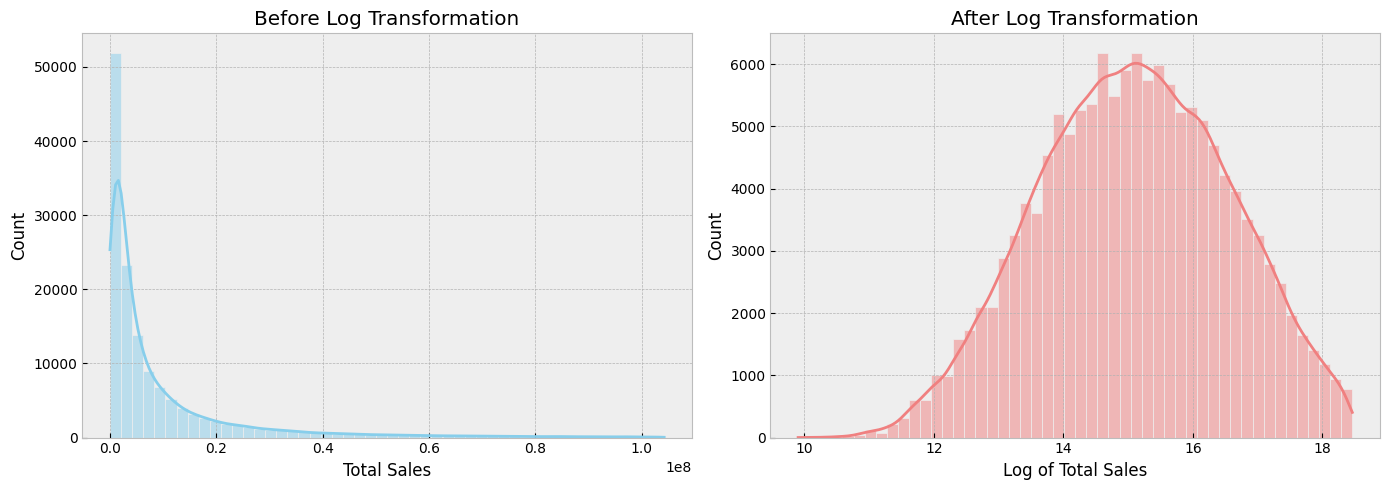

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 plots side by side

# Plot original Total Sales distribution
sns.histplot(ticket_df2['total_sales'], bins=50, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Before Log Transformation')
axes[0].set_xlabel('Total Sales')

# Plot log-transformed Total Sales
sns.histplot(ticket_df2['total_sales_log'], bins=50, ax=axes[1], kde=True, color='lightcoral')
axes[1].set_title('After Log Transformation')
axes[1].set_xlabel('Log of Total Sales')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df_uni = ticket_df2.copy()
#bins in the range of 0-10m upto Upper bound
bins = np.arange(0,104219494,10000000)
df_uni['binned']=pd.cut(ticket_df2['total_sales'],bins)

#creating a value count df with percentage of total sales in each bin
vc_df = df_uni.reset_index().groupby(['binned']).size().to_frame('count')
vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
vc_df = vc_df.reset_index()
vc_df['binned']=vc_df['binned'].astype('str')
vc_df

,binned,count,percentage (%)
0,"(0, 10000000]",103563,74.097950
1,"(10000000, 20000000]",17729,12.684864
2,"(20000000, 30000000]",7541,5.395485
3,"(30000000, 40000000]",3999,2.861231
4,"(40000000, 50000000]",2341,1.674954
5,"(50000000, 60000000]",1602,1.146210
6,"(60000000, 70000000]",1089,0.779165
7,"(70000000, 80000000]",804,0.575251
8,"(80000000, 90000000]",626,0.447895
9,"(90000000, 100000000]",471,0.336994


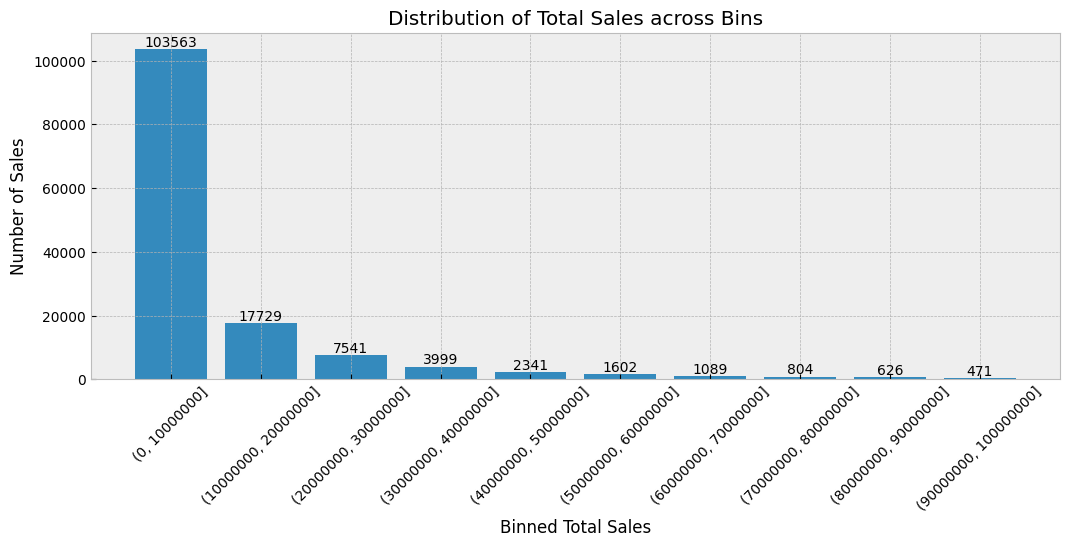

In [ ]:
#lets visualize the distributions across the bins
x = vc_df['binned'].values
y = vc_df['count'].values
plt.bar(x,y)
plt.ylabel('Number of Sales')
plt.xlabel('Binned Total Sales')
plt.title('Distribution of Total Sales across Bins')
plt.xticks(rotation=45)
# code below is for displaying the number of sales on top of the bins
for i,j in zip(x,y):
    label = "{:.1%}".format(j)
    plt.annotate(int(j),(i,j),textcoords='offset points',xytext=(0,2),ha='center',fontsize=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.show()

In [ ]:
# Defining a function to return an aggregrate by time period
def aggregate_period(df, period,column, w_mean = False):
    freq = df.date.dt.to_period(period)
    if w_mean == False:
        s = df.groupby(freq).agg({'total_sales': ['sum']})
        s.columns = ['met']
    else:
        s = df.groupby(freq).agg({column: ['mean']})
        s.columns = [f'met']
    s.reset_index(level=0, inplace=True)
    s.date= s.date.astype(str)
    return s

#Defining a function to return an aggregrate by days of the week
def aggregate_period_weekday(df,column, w_mean= False):
    freq = df['date'].dt.day_name()
    if w_mean == False:
        s = df.groupby(freq).agg({'total_sales': ['sum']})
        s.columns = ['met']
    else:
        s = df.groupby(freq).agg({column: ['mean']})
        s.columns = [f'met']
    s.reset_index(level=0, inplace=True)
    s.date= s.date.astype(str)
    d = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    s = s.set_index('date').reindex(d).reset_index()
    return s

In [ ]:
#Defining a function to visualize the distributions across different time periods
def viz(df, title, n):
    date = df['date'][-n:]
    count = df['met'][-n:]
    mean_val = count.mean()

    plt.figure(figsize=(12, 4))
    plt.plot(date, count, color='black', marker='o', linestyle='-', linewidth=2, label='Sales')
    plt.fill_between(date, count, mean_val, where=(count > mean_val), alpha=0.15, color='green', interpolate=True)
    plt.fill_between(date, count, mean_val, where=(count < mean_val), alpha=0.15, color='red', interpolate=True)
    plt.axhline(mean_val, color='gray', linestyle='--', label='Average')

    # Annotate points
    for i, (x, y) in enumerate(zip(date, count)):
        offset = 10 if i % 2 == 0 else -15
        plt.annotate(f"{y/1e6:.2f}M", (x, y), textcoords="offset points",
                     xytext=(0, offset), ha='center', fontsize=9)

    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.title(title, fontsize=14, fontweight = "bold")
    plt.xlabel("Time Frequency")
    plt.ylabel("Total Sales")
    plt.legend(['Sales', 'above average', 'below average'], prop={'size': 8})
    plt.tight_layout()
    plt.show()

In [ ]:
def viz_subplot(df, title, n, ax):
    date = df['date'][-n:]
    count = df['met'][-n:]
    mean_val = count.mean()

    ax.plot(date, count, color='black', marker='o', linestyle='-', linewidth=2)
    ax.fill_between(date, count, mean_val, where=(count > mean_val), alpha=0.15, color='green', interpolate=True)
    ax.fill_between(date, count, mean_val, where=(count < mean_val), alpha=0.15, color='red', interpolate=True)
    ax.axhline(mean_val, color='gray', linestyle='--')

    # Annotate points
    for i, (x, y) in enumerate(zip(date, count)):
        offset = 10 if i % 2 == 0 else -15
        ax.annotate(f"{y/1e6:.2f}M", (x, y), textcoords="offset points",
                     xytext=(0, offset), ha='center', fontsize=8)

    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xlabel("Time Frequency")
    ax.set_ylabel("Total Sales")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(prop={'size': 8})

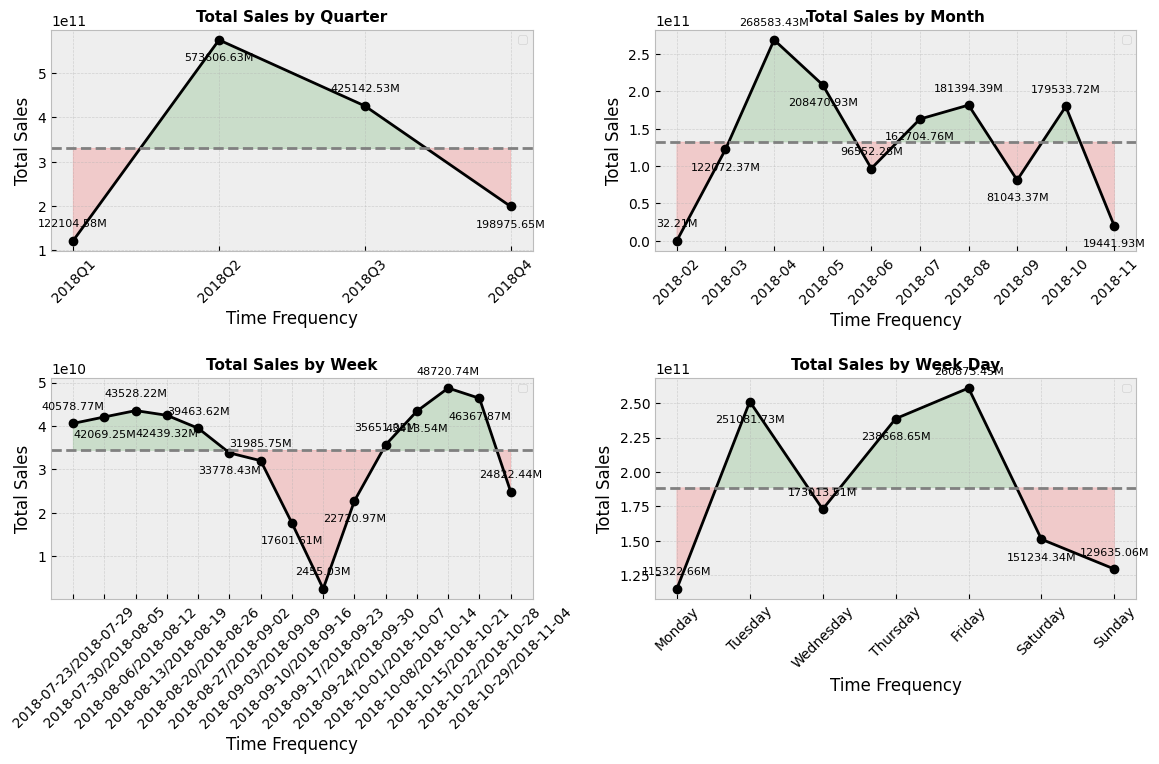

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Smaller grid size

viz_subplot(q, "Total Sales by Quarter", 25, axes[0, 0])
viz_subplot(m, "Total Sales by Month", 25, axes[0, 1])
viz_subplot(w, "Total Sales by Week", 15, axes[1, 0])
viz_subplot(W, "Total Sales by Week Day", 15, axes[1, 1])

plt.tight_layout(pad=2.0)  # Reduced padding for compact layout
plt.show()


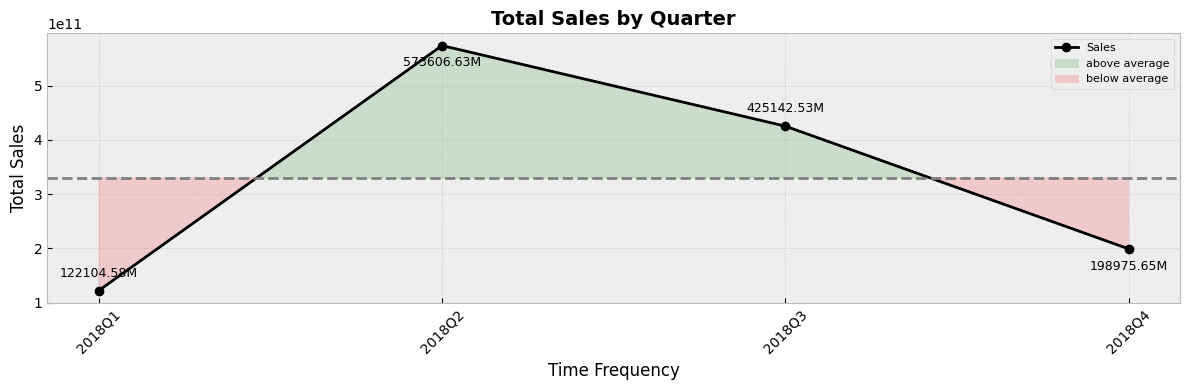

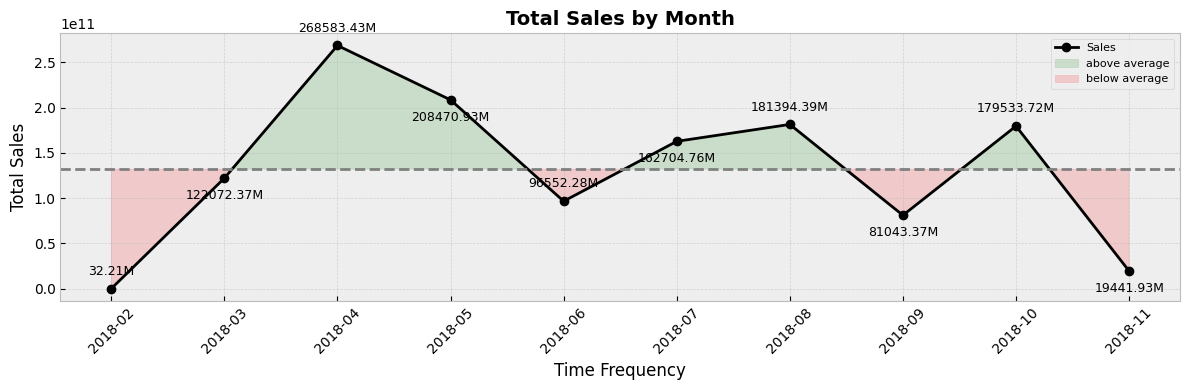

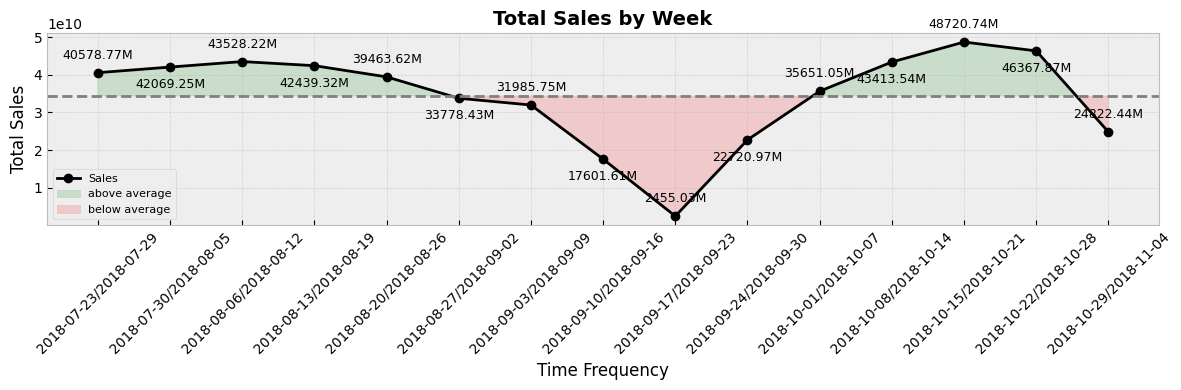

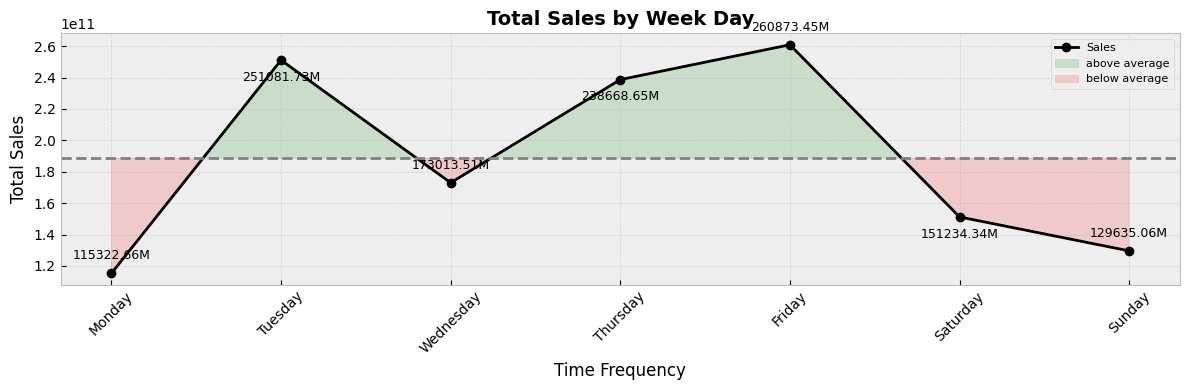

In [ ]:
q = aggregate_period(ticket_df2, 'q','na')
m = aggregate_period(ticket_df2, 'm','na')
w = aggregate_period(ticket_df2, 'w','na')
W = aggregate_period_weekday(ticket_df2,'na')
viz(q ,"Total Sales by Quarter",25)
viz(m ,"Total Sales by Month",25)
viz(w ,"Total Sales by Week",15)
viz(W ,"Total Sales by Week Day",15)

Some Critical Insights :

Total sales are higher than the above average in the 2nd and 3rd quarter. Sales seem to be critically down during the start and the end of the year probably due to New Years and Christmas preparations. According to this data, September seems to be unpopular for watching movies in the theatre. The pre weekend days do better than the weekends probably since people just want to relax and do chores on the weekends.

In [ ]:
#Aggregrate by Day
df = aggregate_period(ticket_df2, 'd','na')
df.set_index('date',inplace=True)
df.rename(columns={'met':'Total_Sales'},inplace=True)
df.sample(10)

,Total_Sales
date,
2018-09-04,7625930000
2018-06-01,6330288996
2018-05-29,6720330000
2018-03-27,12001784999
2018-10-16,10134179994
2018-04-18,8624682000
2018-08-14,9353300000
2018-09-09,3497759998
2018-07-28,4394184994


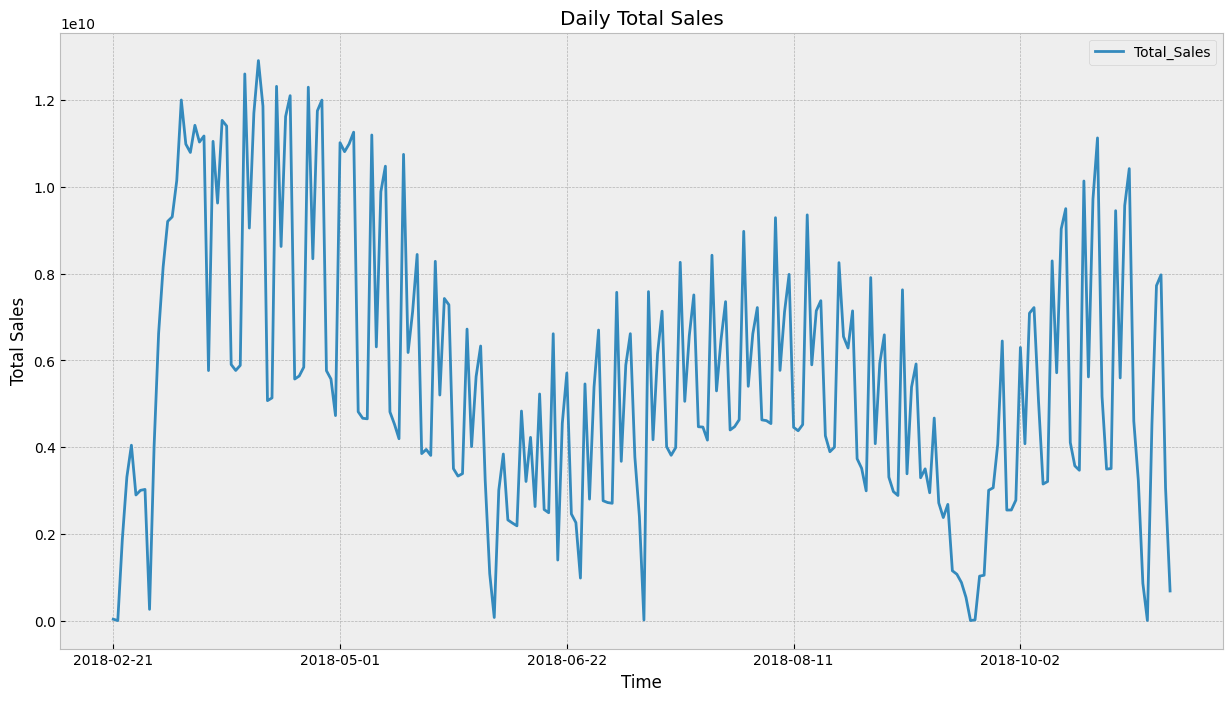

In [ ]:
#Visualizing
df.plot(figsize=(15,8))
plt.title("Daily Total Sales")
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

Stationary is an important concept in time series analyse, A dataset is said to be stationary when it exhibits a constant overall behaviour where the statistical properties do not change overtime. Every point must be independant of each other, although the values don't have to necessarily be the same as long it maintains a trend.

We can clearly see that this dataset is not stationary. Althought just visualizing is not enough, therefore we use the ADF test or the Unit root test to mthematically prove our dataset is not stationary.

Stationary Check - ADF TEST The ADF test is a statistical tool to check whether our dataset is stationary or not. The ADF degree tells us to what degree can the Null Hypothesis (H0) be rejected.

Null Hypothesis (H0) - If failed to be rejected, means that the dataset is not stationary. Alternate Hypothesis (H1) - If 0 is rejected, means that the dataset is stationary.

The ADF test returns a critical value also known as the 'test statistic'. If this value is lower than the threshold values which are at (1% , 5% , 10%) then we can reject the Null Hypothesis.

In [ ]:
#Defining a adf calculator to check the stationary state of the dataset
def adf_calc(df, target):
    timeseries = df[target]
    result = adfuller(timeseries,autolag='AIC') #the adf function
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('Critical Value: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Lags used: %f' %result[2])
    print('Threshold Values:')
    for key, value in result[4].items(): #critical value dict
        print('%s: %.3f' % (key, value))
adf_calc(df , 'Total_Sales')

Critical Value: -2.252671
p-value: 0.187687
Lags used: 14.000000
Threshold Values:
1%: -3.461
5%: -2.875
10%: -2.574


In [ ]:
#finding the log values of total sales
df['total_sales_log'] = np.log(df.Total_Sales)
df.head()

,Total_Sales,total_sales_log
date,,
2018-02-21,32030000,17.282184
2018-02-23,180000,12.100712
2018-03-14,1870938994,21.349706
2018-03-15,3309334994,21.920013
2018-03-16,4043241998,22.120313


In [ ]:
def differencing(df,date, order=1):

    #setting date as datetime object and setting it as the index
    df[date]=pd.to_datetime(df[date],errors='coerce')
    df=df.set_index(date)

    print(f'The order of the transform is {order}')


    if order == 1:
        #calculate t-1
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)

        #calculate first order dt
        df['target_order_dt']=df['total_sales_log'] - df['t_minus_1']


    elif order == 2:
        #calculate t-2
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)
        df['first_order_dt']=df['total_sales_log'] - df['t_minus_1'] #returns 1st order
        #have to shift the first order values then subtract that from the first order values
        df['first_order_dt_minus_1']=df['first_order_dt'].shift(periods=1)
        df['target_order_dt']=df['first_order_dt'] - df['first_order_dt_minus_1'] # returns 2nd order dt

    elif order == 3:
        #calculate t=3
        df['t_minus_1']=df['total_sales_log'].shift(periods=1)
        df['first_order_dt']=df['total_sales_log'] - df['t_minus_1'] # returns 1st order
        df['first_order_dt_minus_1']=df['first_order_dt'].shift(periods=1)
        df['second_order_dt']=df['first_order_dt'] - df['first_order_dt_minus_1'] # returns 2nd order
        df['second_order_dt_minus_1']=df['second_order_dt'].shift(periods=1)
        df['target_order_dt']=df['second_order_dt'] - df['second_order_dt_minus_1'] # returns 3rd order

    else:
        raise Exception("Order for this particular problem shoud be <=3 ")

    #lets visualize the dataset after transforming it
    df[['target_order_dt']].plot(figsize=(15,8))
    plt.title(f'Total Sales After Differencing with Order {order} Against Time')
    plt.xlabel('Time')
    plt.ylabel("Total Sales After Differencing")
    plt.show()

    return df

The order of the transform is 1


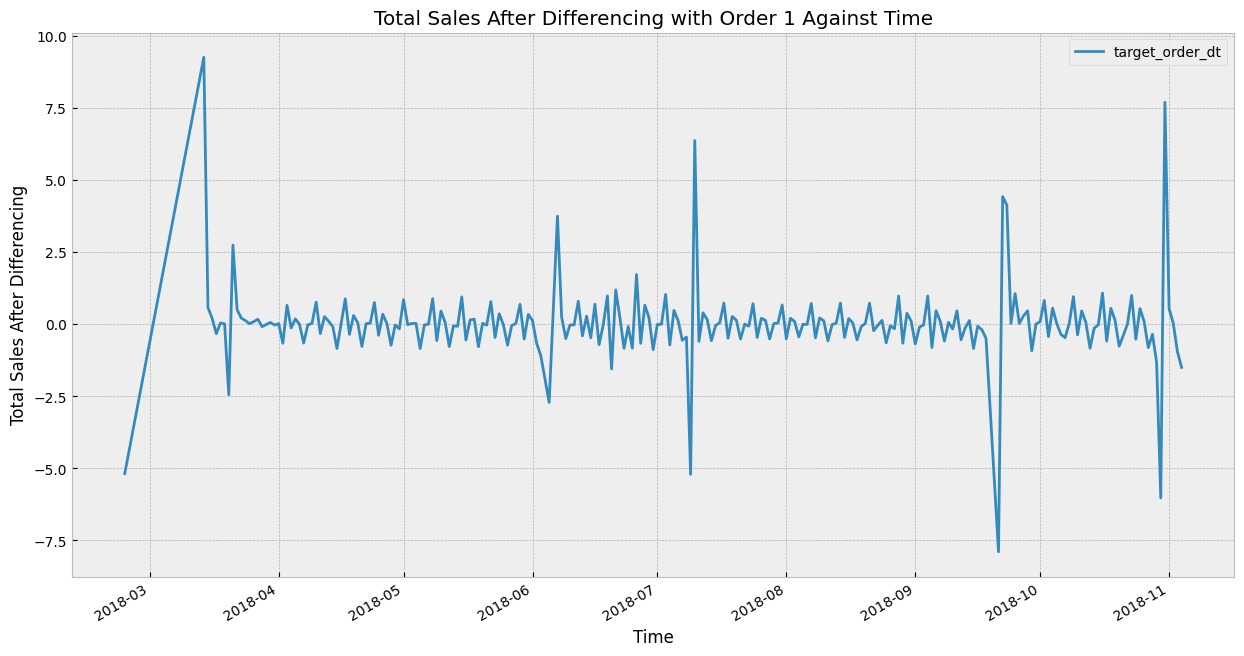

,Total_Sales,total_sales_log,t_minus_1,target_order_dt
date,,,,
2018-02-21,32030000,17.282184,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471
2018-03-14,1870938994,21.349706,12.100712,9.248994
2018-03-15,3309334994,21.920013,21.349706,0.570307
2018-03-16,4043241998,22.120313,21.920013,0.200300
...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493
2018-11-01,7722309998,22.767379,22.231552,0.535828
2018-11-02,7970860000,22.799058,22.767379,0.031679


In [ ]:
df_temp = df.reset_index()
#1st order differencing
df1_dt = differencing(df_temp, 'date', order=1)
display(df1_dt)

The order of the transform is 2


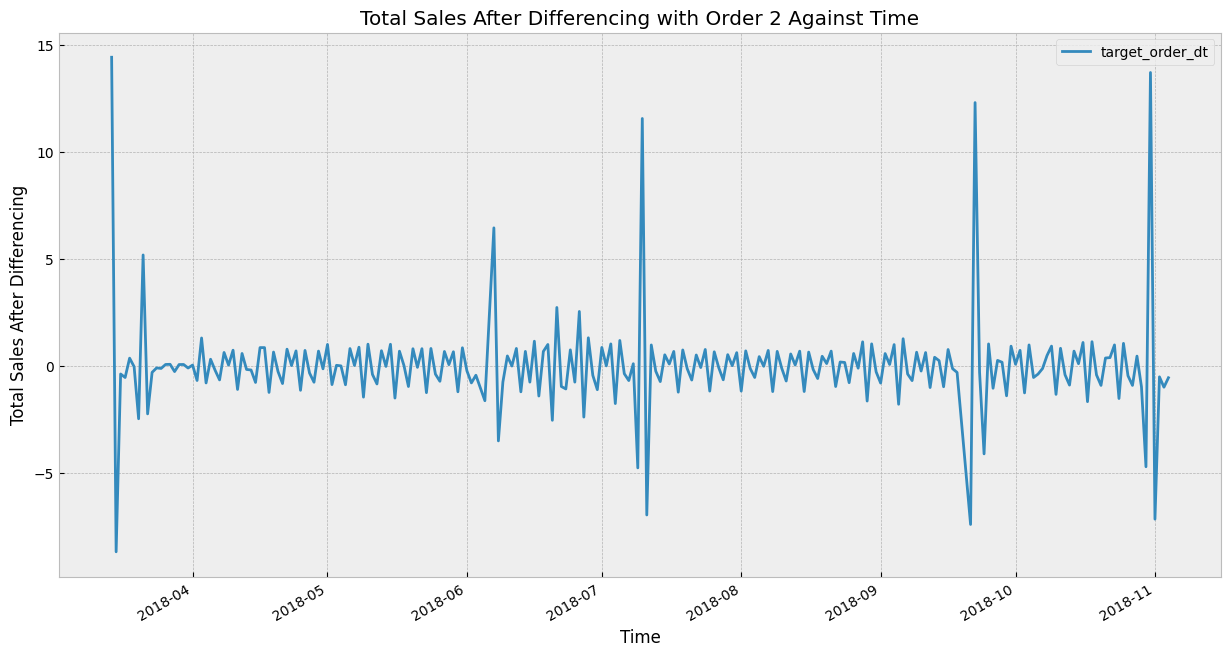

,Total_Sales,total_sales_log,t_minus_1,first_order_dt,first_order_dt_minus_1,target_order_dt
date,,,,,,
2018-02-21,32030000,17.282184,NaN,NaN,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471,NaN,NaN
2018-03-14,1870938994,21.349706,12.100712,9.248994,-5.181471,14.430466
2018-03-15,3309334994,21.920013,21.349706,0.570307,9.248994,-8.678687
2018-03-16,4043241998,22.120313,21.920013,0.200300,0.570307,-0.370007
...,...,...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493,-6.028757,13.717249
2018-11-01,7722309998,22.767379,22.231552,0.535828,7.688493,-7.152665
2018-11-02,7970860000,22.799058,22.767379,0.031679,0.535828,-0.504149


In [ ]:
#2nd order differencing
df2_dt = differencing(df_temp, 'date', order=2)
display(df2_dt)

The order of the transform is 3


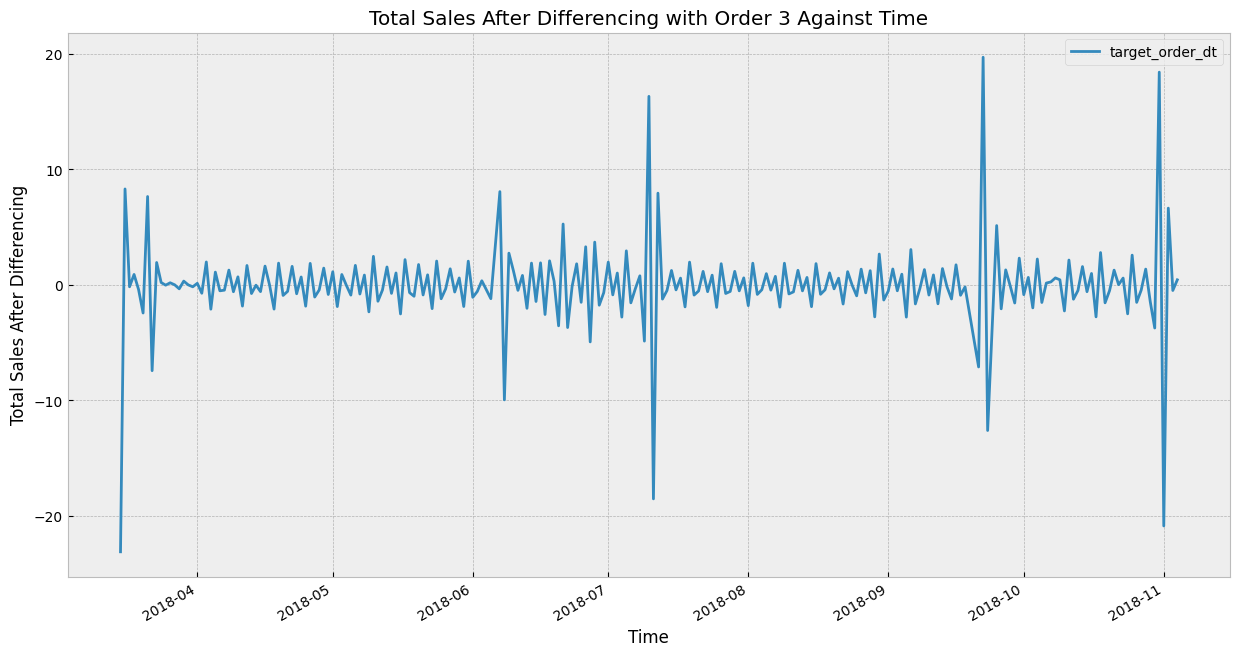

,Total_Sales,total_sales_log,t_minus_1,first_order_dt,first_order_dt_minus_1,second_order_dt,second_order_dt_minus_1,target_order_dt
date,,,,,,,,
2018-02-21,32030000,17.282184,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,180000,12.100712,17.282184,-5.181471,NaN,NaN,NaN,NaN
2018-03-14,1870938994,21.349706,12.100712,9.248994,-5.181471,14.430466,NaN,NaN
2018-03-15,3309334994,21.920013,21.349706,0.570307,9.248994,-8.678687,14.430466,-23.109153
2018-03-16,4043241998,22.120313,21.920013,0.200300,0.570307,-0.370007,-8.678687,8.308680
...,...,...,...,...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493,-6.028757,13.717249,-4.704206,18.421456
2018-11-01,7722309998,22.767379,22.231552,0.535828,7.688493,-7.152665,13.717249,-20.869914
2018-11-02,7970860000,22.799058,22.767379,0.031679,0.535828,-0.504149,-7.152665,6.648516


In [ ]:
#3rd order differencing
df3_dt = differencing(df_temp, 'date', order=3)
display(df3_dt)

In [ ]:
df2 = df1_dt.dropna()
print("check stationarity of order 1")
adf_calc(df2, 'target_order_dt')

check stationarity of order 1
Critical Value: -11.317874
p-value: 0.000000
Lags used: 5.000000
Threshold Values:
1%: -3.459
5%: -2.874
10%: -2.574


As the ADF Test Statistic is more negative than all threshold values, and the p-value is below 0.05, we reject the null hypothesis and conclude that the series is stationary.

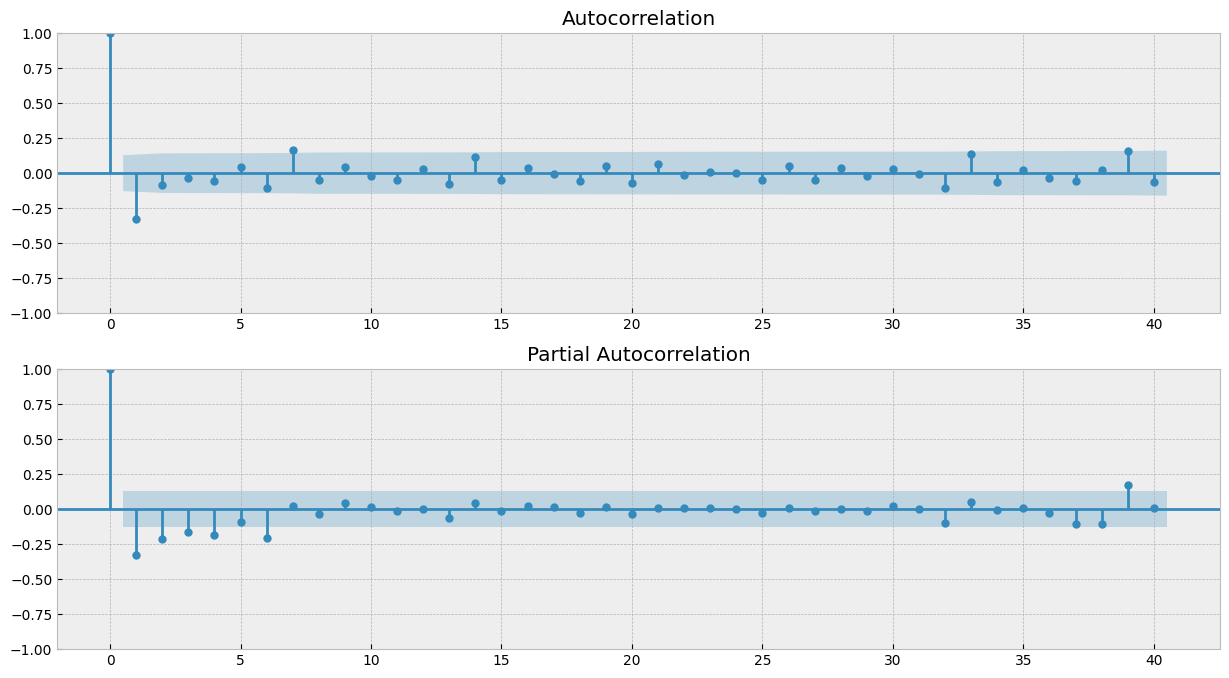

In [ ]:
#Visualizing the Autocorrelation and the Partial autocorrelation curves
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2.target_order_dt,lags=40,ax=ax1) #autocorrealtion curve
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2.target_order_dt,lags=40,ax=ax2) #partialauto curve

This code is plotting the autocorrelation (ACF) and partial autocorrelation (PACF) curves for the time series data in the df DataFrame's target_order_dt column.

The ACF shows the correlation between the time series and its lagged values, while the PACF shows the correlation between the time series and its lagged values after accounting for the effect of intervening lags.

The lags parameter is set to 40, which means that the ACF and PACF curves will show the correlation values for up to 40 lags.

The resulting plot will have two subplots, with the ACF plot in the top subplot and the PACF plot in the bottom subplot. The figsize parameter sets the size of the figure.

In [ ]:
# Defining a function to calculate the simple moving average and weighted moving average
def simple_moving_average(arr, window_size, weights=None):
    i = 0
    len_array = len(arr)+1 #as we are going to predict sales for a new day
    answer = [None] * len_array #array thats going to hold answers
    computation = [None] * len_array  #array thats going to hold how the computation took place
    row = window_size
    # Initialize an empty list to store moving averages
    moving_averages = []

    # Loop through the array len_array andconsider every window size as 3
    while i < len(arr) - window_size + 1:

    # Calculate the average of current window
        if weights == None:
            array_values = arr[i:i+window_size] #sliding the window width in the series
            window_average = round(np.sum(array_values) / window_size, 3) # avg after considering window_width
            answer[row] = window_average #assigning the window avg to the appropriate answer array
            computation[row] = (f" sum({array_values}) / ({window_size})  =  {window_average}")
            row+=1
        else:
            array_values = arr[i:i+window_size]
            array_values_multiplied = [a * b for a, b in zip(array_values, weights)] #multiplied by weight factor
            array_values_multiplied = [round(num, 4) for num in array_values_multiplied]
            window_average = round(np.sum(array_values_multiplied), 4)
            answer[row] = window_average
            computation[row] = (f"sum({array_values_multiplied}) =  {window_average}")
            row+=1
        # Store the average of current window in moving average list
        moving_averages.append(window_average)
        # Shift window to right by one position
        i += 1
    arr.append(None) #so that it can hold the forecasted value

    #creating a df to compare actual and forecasted values
    d = {'Actual': arr, 'Forecasted':answer, 'Computation':computation}
    df_result = pd.DataFrame(d)

    print(f"Forecasted result for next day: {answer[-1]}")

    df_metric =  df_result.dropna()
    y_actual = df_metric['Actual'].values.tolist()
    y_predicted  = df_metric['Forecasted'].values.tolist()

    return df_result

In [ ]:
index = df.index.tolist()
index.append('2018-11-05') #adding the next day
arr  = df[['Total_Sales']].values.flatten().tolist() #Total sales in a list format
#no. of raw observations considered for ma. 2 cause acf curve suggests so
window_size = 2
# weights = [0.2,0.3,0.5] #must add up to 1 (is arbitary)
result_ma = simple_moving_average(arr, window_size, weights=None)
result_ma.index = index
result_ma = result_ma.dropna()
result_ma.tail(10)

Forecasted result for next day: 1874382500.0


,Actual,Forecasted,Computation
2018-10-26,1.041976e+10,7.580779e+09,"sum([5594120000, 9567438000]) / (2) = 75807..."
2018-10-27,4.599490e+09,9.993599e+09,"sum([9567438000, 10419759998]) / (2) = 9993..."
2018-10-28,3.231999e+09,7.509625e+09,"sum([10419759998, 4599489998]) / (2) = 7509..."
2018-10-29,8.594610e+08,3.915744e+09,"sum([4599489998, 3231999000]) / (2) = 39157..."
2018-10-30,2.070000e+06,2.045730e+09,"sum([3231999000, 859461000]) / (2) = 204573..."
2018-10-31,4.518978e+09,4.307655e+08,"sum([859461000, 2070000]) / (2) = 430765500.0"
2018-11-01,7.722310e+09,2.260524e+09,"sum([2070000, 4518978000]) / (2) = 22605240..."
2018-11-02,7.970860e+09,6.120644e+09,"sum([4518978000, 7722309998]) / (2) = 61206..."
2018-11-03,3.065780e+09,7.846585e+09,"sum([7722309998, 7970860000]) / (2) = 78465..."
2018-11-04,6.829850e+08,5.518320e+09,"sum([7970860000, 3065780000]) / (2) = 55183..."


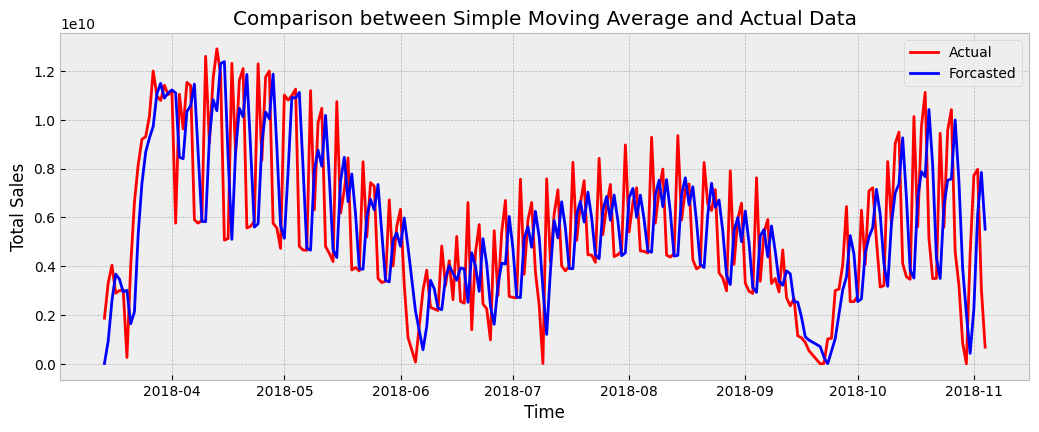

In [ ]:
temp_df = result_ma.reset_index()
temp_df['index'] = pd.to_datetime(temp_df['index'],errors='coerce')
result_ma= temp_df.set_index('index')

fig=matplotlib.pyplot.gcf()
fig.set_size_inches(12.5,4.5)
plt.title(f'Comparison between Simple Moving Average and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(result_ma['Actual'],label='Actual',color = 'r')
plt.plot(result_ma['Forecasted'],label='Forcasted', color = 'b')
plt.legend()

In [ ]:
method_list=[] #going to hold the method
algorithm_list = [] #specific algorithm
rmse_list =[] # root mean squared error
mse_list = [] #mean squared error
mae_list = [] #mean absolute error
r2_list = [] #correlation square -tells us how good does the data fit the line
d = {
    'Method': method_list,
    'Algorithm':algorithm_list,
    'MSE': mse_list,
    'RMSE': rmse_list,
    'MAE': mae_list,
    'R2': r2_list
}

def get_metric(actual,predicted,method,algorithm):
    #compute metrics
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    # append list
    method_list.append(method)
    algorithm_list.append(algorithm)
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)


    result = pd.DataFrame(d)
    return result

In [ ]:
#Simple Moving average Evaluation
actual = result_ma['Actual'].tail(30) #last month
predicted = result_ma['Forecasted'].tail(30)
method = 'Time Series'
algorithm = 'Simple Moving Average'
get_metric(actual,predicted,method,algorithm)


,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093


A negative r2 value is not very attractive as it means that the forecast fits worse than the horizontal line or the mean of the function

#Weighted Moving Average

In [ ]:
index = df.index.tolist()
index.append('2018-11-05') #adding the next day
arr  = df[['Total_Sales']].values.flatten().tolist() #Total sales in a list format
#no. of raw observations considered for ma. 2 cause acf curve suggests so
window_size = 2
weights = [0.2,0.3,0.5] #must add up to 1 (is arbitary)
result_ma_weighted = simple_moving_average(arr, window_size, weights=weights)
result_ma_weighted.index = index
result_ma_weighted = result_ma_weighted.dropna()
result_ma_weighted.tail(10)

Forecasted result for next day: 818051500.0


,Actual,Forecasted,Computation
2018-10-26,1.041976e+10,3.989055e+09,"sum([1118824000.0, 2870231400.0]) = 3989055400.0"
2018-10-27,4.599490e+09,5.039416e+09,"sum([1913487600.0, 3125927999.4]) = 5039415599.4"
2018-10-28,3.231999e+09,3.463799e+09,"sum([2083951999.6, 1379846999.4]) = 3463798999.0"
2018-10-29,8.594610e+08,1.889498e+09,"sum([919897999.6, 969599700.0]) = 1889497699.6"
2018-10-30,2.070000e+06,9.042381e+08,"sum([646399800.0, 257838300.0]) = 904238100.0"
2018-10-31,4.518978e+09,1.725132e+08,"sum([171892200.0, 621000.0]) = 172513200.0"
2018-11-01,7.722310e+09,1.356107e+09,"sum([414000.0, 1355693400.0]) = 1356107400.0"
2018-11-02,7.970860e+09,3.220489e+09,"sum([903795600.0, 2316692999.4]) = 3220488599.4"
2018-11-03,3.065780e+09,3.935720e+09,"sum([1544461999.6, 2391258000.0]) = 3935719999.6"
2018-11-04,6.829850e+08,2.513906e+09,"sum([1594172000.0, 919734000.0]) = 2513906000.0"


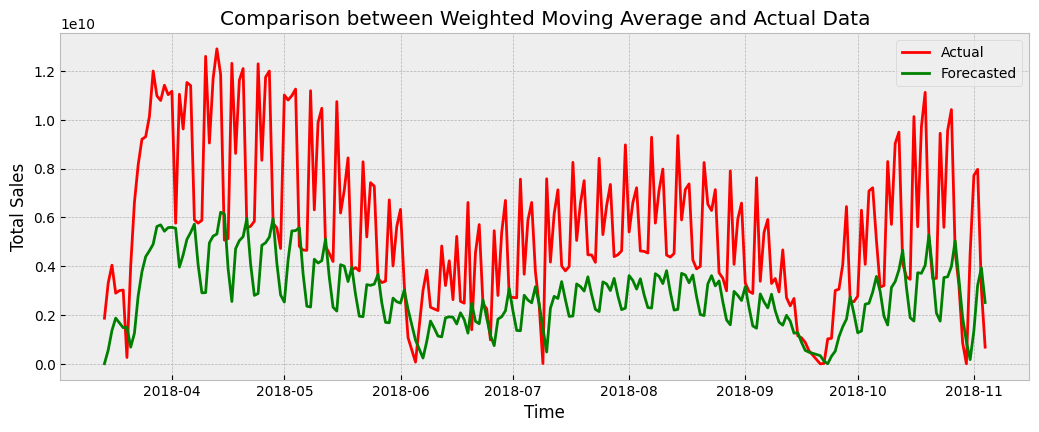

In [ ]:
#Lets visualize the weighted moving average
temp_df = result_ma_weighted.reset_index()
temp_df['index'] = pd.to_datetime(temp_df["index"],errors='coerce')
result_ma_weighted = temp_df.set_index('index')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title(f'Comparison between Weighted Moving Average and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(result_ma_weighted.Actual,label = 'Actual', color='r' )
plt.plot(result_ma_weighted['Forecasted'],label = 'Forecasted', color='g' )
plt.legend()

In [ ]:
#Evaluating the weighted moving average
actual = result_ma_weighted['Actual'].tail(30)
predicted = result_ma_weighted['Forecasted'].tail(30)
method = 'Time Series'
algorithm = 'Weighted Moving Average'
get_metric(actual, predicted, method, algorithm)

,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093
1,Time Series,Weighted Moving Average,1.711698e+19,4.137267e+09,3.139920e+09,-0.770970


Forecasting with ARIMA (Autoregressive Integrated Moving Average) is a model that uses differencing to convert the non stationary dataset into a stationary one. It uses Autocorrelations and moving averages over residual errors in the data to forecast future values.

Finding the Best parameters for our ARIMA model. Some important parameters are: 'p': Number of time lags 'd': differencing order 'q': order of the moving averages or size of the moving average window 'm': time frequency, i.e 12 for a month

In [ ]:
auto_arima_fit = pm.auto_arima(df.Total_Sales, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             seasonal=False, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10750.720, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10815.731, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10788.290, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10756.123, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10813.733, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10752.129, Time=1.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10739.181, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10749.187, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10751.732, Time=1.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10744.299, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10757.280, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10732.395, Time=3.70 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10712.241, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] i

In [ ]:
model = ARIMA(df.Total_Sales, order=(3,1,2))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Sales   No. Observations:                  234
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5348.988
Date:                Fri, 04 Apr 2025   AIC                          10709.975
Time:                        21:09:30   BIC                          10730.681
Sample:                             0   HQIC                         10718.325
                                - 234                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8799      0.053     16.637      0.000       0.776       0.984
ar.L2         -0.3481      0.070     -4.951      0.000      -0.486      -0.210
ar.L3         -0.3199      0.061     -5.205      0.0

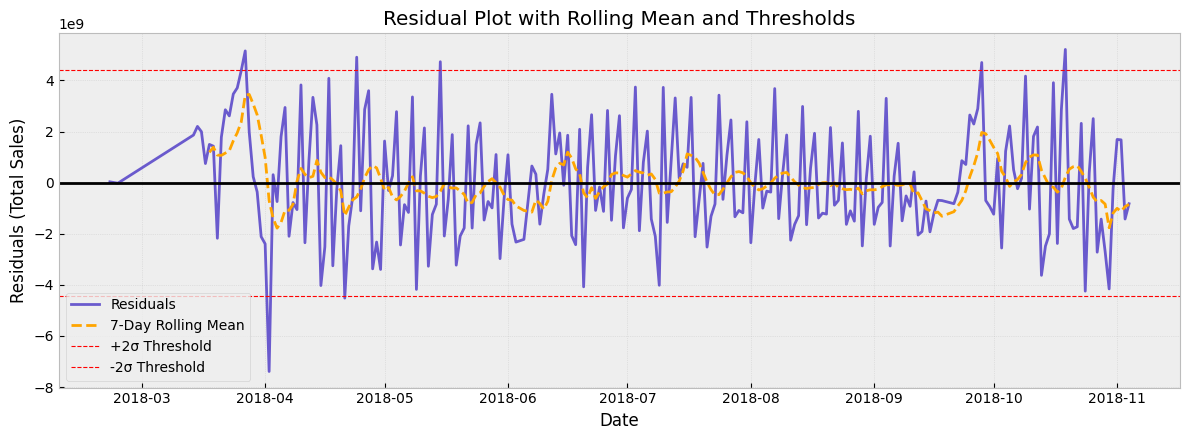

In [ ]:
residuals = pd.DataFrame(results.resid)
temp_df = residuals.reset_index()
temp_df['date'] = pd.to_datetime(temp_df['date'], errors='coerce')
residuals = temp_df.set_index('date')

# Rolling mean
rolling_mean = residuals.rolling(window=7).mean()

# Std deviation thresholds
std = residuals.std().values[0]
threshold = 2 * std

# Plot
fig, ax = plt.subplots(figsize=(12, 4.5))
ax.plot(residuals, label='Residuals', color='slateblue')
ax.plot(rolling_mean, label='7-Day Rolling Mean', color='orange', linestyle='--')
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=threshold, color='red', linestyle='--', linewidth=0.8, label='+2σ Threshold')
ax.axhline(y=-threshold, color='red', linestyle='--', linewidth=0.8, label='-2σ Threshold')

# Labels and title
plt.title('Residual Plot with Rolling Mean and Thresholds')
plt.xlabel('Date')
plt.ylabel('Residuals (Total Sales)')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

,0
count,2.340000e+02
mean,3.766651e+07
std,2.212065e+09
min,-7.388977e+09
25%,-1.542946e+09
50%,-3.472413e+08
75%,1.846770e+09
max,5.213666e+09


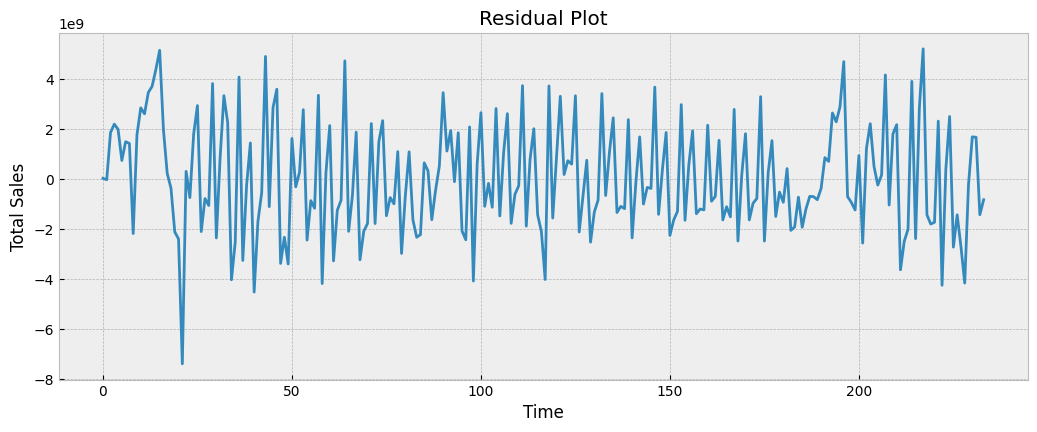

In [ ]:
residuals = pd.DataFrame(results.resid)
temp_df = residuals.reset_index()
temp_df['date']=pd.to_datetime(temp_df['date'],errors='coerce')
residuals =temp_df.set_index('date')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel("Total Sales")
plt.plot(residuals.values )
residuals.describe()


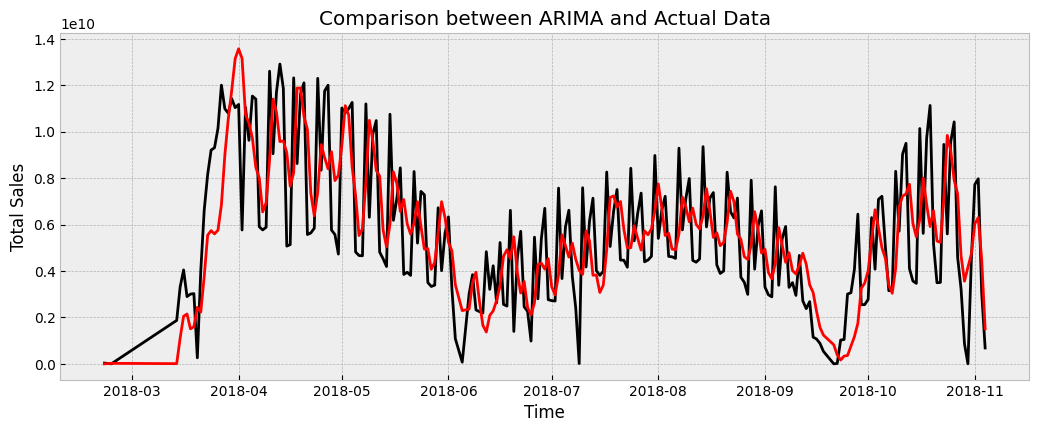

In [ ]:
#defining a function to always reset time as the index after converting it a datetime object
def index_time(df, attribute):
    temp = df.reset_index()
    temp[attribute] = pd.to_datetime(temp[attribute],errors='coerce')
    df = temp.set_index(attribute)
    return df

#plotting
index_list=df.index.tolist()
preds= results.predict(0,233)
preds= preds.set_axis(index_list)
preds=preds.to_frame()
preds=index_time(preds,'index')#the pred values
df = index_time(df,'date') #the actual values

fig=matplotlib.pyplot.gcf()
fig.set_size_inches(12.5,4.5)
plt.title(f'Comparison between ARIMA and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(df.Total_Sales[:234],label='Actual', color = 'black')
plt.plot(preds,label = 'Predicted' , color = 'r')

In [ ]:
#Forecasting

#Defining a function to forecast future sales with the model
def get_forecast_values(df, N =30):
    last_date = df.reset_index().at[len(df)-1,'date'] #extracting the last date
    print(f"The last date is: {last_date}")
    forecast_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
    print(f"start forcast date: {forecast_date}")
    forecast = results.forecast(steps=N) #forecasting for N days
    forecast_index = pd.date_range(start=forecast_date, periods=N)
    df_forecast = pd.DataFrame({'forecast':forecast.values},index=forecast_index)
    return df_forecast

#Forecasting the Total sales for the next 30 days using the ARIMA Model
df_forecast = get_forecast_values(df,N = 30)
df_forecast

The last date is: 2018-11-04 00:00:00
start forcast date: 2018-11-05 00:00:00


,forecast
2018-11-05,2.261784e+08
2018-11-06,1.453755e+09
2018-11-07,3.455084e+09
2018-11-08,4.934891e+09
2018-11-09,5.147710e+09
2018-11-10,4.179733e+09
2018-11-11,2.780589e+09
2018-11-12,1.818330e+09
2018-11-13,1.768262e+09
2018-11-14,2.506682e+09


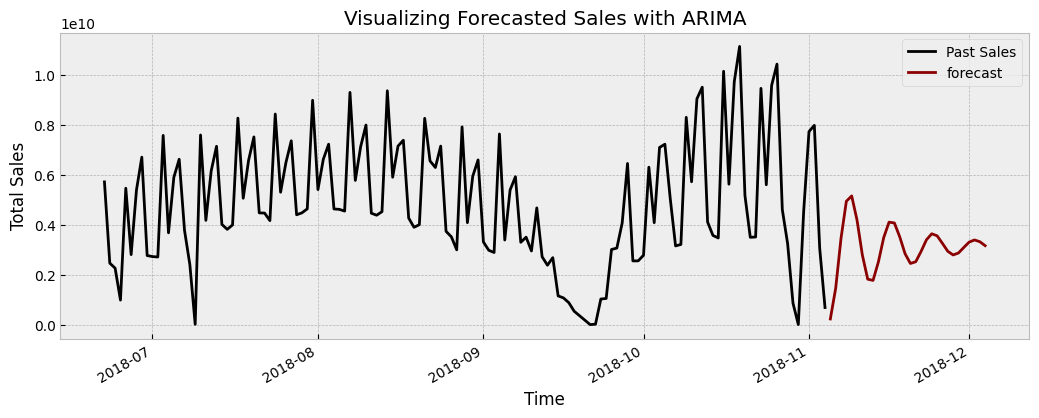

,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093
1,Time Series,Weighted Moving Average,1.711698e+19,4.137267e+09,3.139920e+09,-0.770970
2,Time Series,ARIMA,7.127937e+18,2.669820e+09,2.131719e+09,0.553647


In [ ]:
#visualizing the forecasted values
def forecast_plot(df, df_forecast, method):
    ci = df_forecast.values
    ax = df[100:].Total_Sales.plot(label='Past Sales', color ='black', figsize=(20, 15))
    df_forecast.plot(ax=ax,label='Forecasted Sales',color='darkred')
#     ax.fill_between(df_forecast.index,
#                     ci[:,-1],
#                     ci[:,0], color='g', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(12.5, 4.5)
    plt.legend()

    plt.title(f'Visualizing Forecasted Sales with {method}')
    plt.xlabel('Time')
    plt.ylabel("Total Sales")
    return plt.show()

forecast_plot(df, df_forecast, 'ARIMA')
#evaluating the model with metrics
ar_actual = df['Total_Sales'][:30]
ar_predicted = results.predict()[:30]
ar_algorithm = 'ARIMA'
ar_method = 'Time Series'
get_metric(ar_actual,ar_predicted,ar_method,ar_algorithm)
#The R2 value is pretty good and the MSE is the lowest.

In [ ]:
auto_sarimax_fit = pm.auto_arima(df.Total_Sales, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             seasonal=True,d=None,D=1, trace=True, error_action='ignore', suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10445.621, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10359.840, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10444.061, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10395.094, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=10354.922, Time=0.77 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=10429.369, Time=0.60 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=10353.225, Time=1.04 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=10360.993, Time=0.40 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

In [ ]:
#Training the model with the optimal parameters
model = SARIMAX(df.Total_Sales,order=(3, 0, 3),
              seasonal_order=(2, 1, 0, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Total_Sales   No. Observations:                  234
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 12)   Log Likelihood               -4498.467
Date:                             Fri, 04 Apr 2025   AIC                           9014.934
Time:                                     21:11:59   BIC                           9044.391
Sample:                                          0   HQIC                          9026.860
                                             - 234                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2515      0.876      1.428      0.153      -0.466       2.969
ar.L2         -1.0127      1.061     -0.955      0.340      -3.091       1.066
ar.L3          0.0578      0.830      0.070      0.944      -1.570       1.686
ma.L1         -0.9404      0.881     -1.067      0.286      -2.667       0.787
ma.L2          0.9368      0.906      1.034      0.301      -0.839       2.712
ma.L3          0.0919      0.907      0.101      0.919      -1.686       1.870
ar.S.L12      -0.5491      0.121     -4.554      0.000      -0.785      -0.313
ar.S.L24      -0.1003      0.097     -1.034      0.301      -0.290       0.090
sigma2      8.117e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.87   Prob(JB):                         0.12
Heteroskedasticity (H):               0.99   Skew:                             0.26
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.74e+54. Standard errors may be unstable.
"""

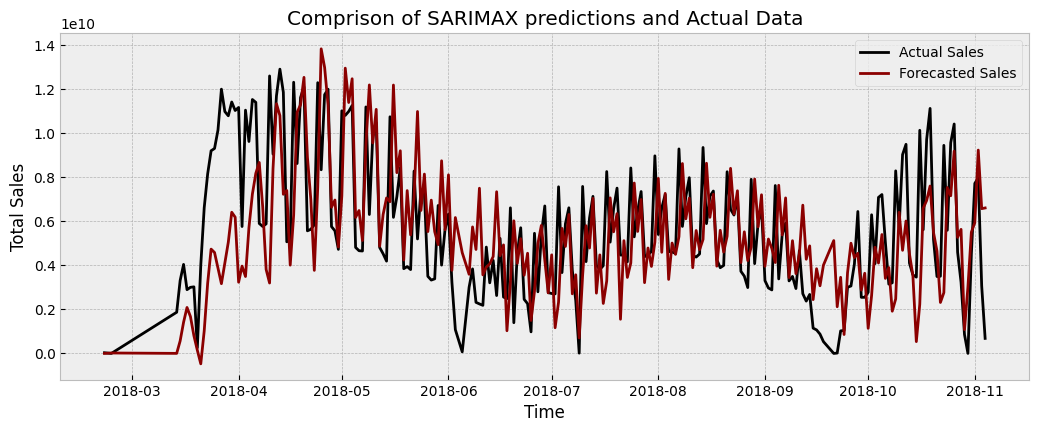

In [ ]:
#Comparing the Predicted Values with the Actual Values
index_list = df.index.tolist()
preds = results.predict(0,233)
preds= preds.set_axis(index_list)
preds = preds.to_frame()
preds = index_time(preds, 'index')
df = index_time(df , 'date')


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5,4.5)
plt.title("Comprison of SARIMAX predictions and Actual Data")
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.plot(df.Total_Sales[:234],label='Actual Sales' , color = 'k')
plt.plot(preds, label="Forecasted Sales", color = 'darkred')
plt.legend()


In [ ]:
df_forecast = get_forecast_values(df, N =30)
df_forecast

The last date is: 2018-11-04 00:00:00
start forcast date: 2018-11-05 00:00:00


,forecast
2018-11-05,1.215476e+09
2018-11-06,1.159260e+09
2018-11-07,5.226957e+09
2018-11-08,6.911490e+09
2018-11-09,1.173289e+10
2018-11-10,6.902022e+09
2018-11-11,4.047584e+09
2018-11-12,3.298144e+09
2018-11-13,2.075449e+09
2018-11-14,4.982398e+09


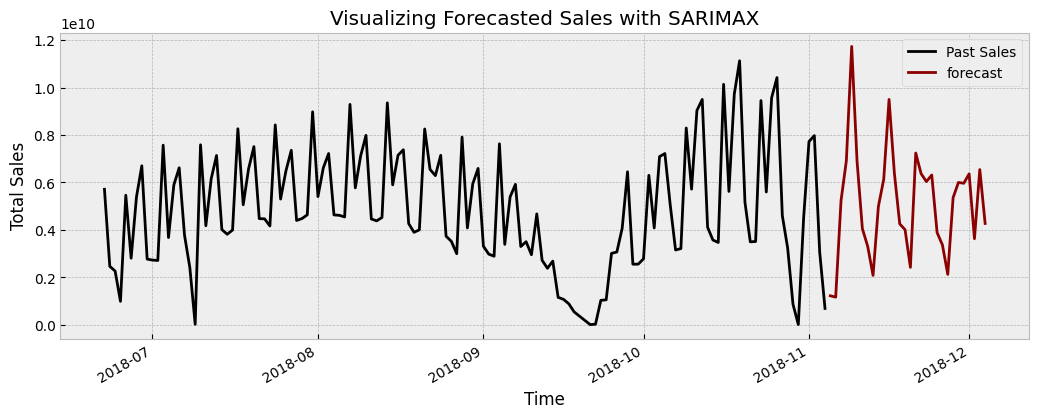

,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093
1,Time Series,Weighted Moving Average,1.711698e+19,4.137267e+09,3.139920e+09,-0.770970
2,Time Series,ARIMA,7.127937e+18,2.669820e+09,2.131719e+09,0.553647
3,Time Series,SARIMAX,2.195495e+19,4.685610e+09,3.914760e+09,-0.374825


In [ ]:
#visualize the forecast
forecast_plot(df, df_forecast,'SARIMAX')
#adding it to the evaluation table
sr_actual = df['Total_Sales'][:30]
sr_predicted = results.predict()[:30]
sr_algorithm = 'SARIMAX'
sr_method = 'Time Series'
get_metric(sr_actual,sr_predicted,sr_method,sr_algorithm)


Among the four models, ARIMA performs the best in terms of MSE, RMSE, and MAE, with the lowest values for these metrics. This suggests that the ARIMA model is the most accurate among the four models in predicting the target variable. However, its R2 value of 0.553647 indicates that it may not be the best model for explaining the variance in the data.

The Simple Moving Average and Weighted Moving Average models have similar performance metrics, with the Weighted Moving Average performing slightly worse in terms of MSE, RMSE, and MAE. Both models have negative R2 values, indicating that they are not good at explaining the variance in the data.

The SARIMAX model has the worst performance among the four models, with the highest values for MSE, RMSE, and MAE, and a negative R2 value. This suggests that the SARIMAX model is the least accurate and not a good fit for the data.

Overall, based on the performance metrics presented in the table, the ARIMA model is the most accurate among the four models in predicting the target variable, but none of the models have a good R2 value, indicating that there may be other factors that need to be considered when modeling the data.

Forecasting with Machine Learning Algorithms

Linear Regression - Standard and starighforward Random Forest Regressor - A bit more deep and complicated XGB Regressor - More on the advanced side.

In [ ]:
df2.columns
#Defining a function to assemble the modified df
#Note - This time I am going to use the df with the first order differencing that is stationary
# Considering 5 lags for my data
def get_data():
    df2 = df.copy()
    df2['lag_1'] =  df2['Total_Sales'].shift(periods=1)
    df2['lag_2'] =  df2['Total_Sales'].shift(periods=2)
    df2['lag_3'] =  df2['Total_Sales'].shift(periods=3)
    df2['lag_4'] =  df2['Total_Sales'].shift(periods=4)
    df2['lag_5'] =  df2['Total_Sales'].shift(periods=5)
    df2 = df2.dropna()
    df2.drop('total_sales_log', axis=1 ,inplace=True)
    return df2
df2

,Total_Sales,total_sales_log,t_minus_1,target_order_dt
date,,,,
2018-02-23,180000,12.100712,17.282184,-5.181471
2018-03-14,1870938994,21.349706,12.100712,9.248994
2018-03-15,3309334994,21.920013,21.349706,0.570307
2018-03-16,4043241998,22.120313,21.920013,0.200300
2018-03-17,2895672996,21.786483,22.120313,-0.333829
...,...,...,...,...
2018-10-31,4518978000,22.231552,14.543059,7.688493
2018-11-01,7722309998,22.767379,22.231552,0.535828
2018-11-02,7970860000,22.799058,22.767379,0.031679


In [ ]:
# Function to split the dataset into train and test sets
def train_test_split(df2, n_test):
    x_train = df2.iloc[:-n_test , 1:]  # removing last 30 days and total_sales col
    y_train = df2.iloc[:-n_test , :1] # removing last 30 days and only taking total_Sales col
    x_test = df2.iloc[-n_test: , 1:]  # considering last 30 days without total sales
    y_test = df2.iloc[-n_test: , :1]  # total sales of last 30 days

    return x_train, y_train, x_test, y_test

In [ ]:
#Defining a function to train the models
def model_train(x_train, y_train, model, model_params):
    if model == 'XGB':
        print("Using XGB model")
        model = model_params #specified parameters
    elif model == 'RFR':
        print("Using RFR model")
        model = model_params
    else:
        print("Using Linear Regression model")
        model = model_params

    # fit model
    model = model.fit(x_train, y_train)

    #predicted y_train values
    y_train_pred = model.predict(x_train)
    return model , y_train_pred

#defining a function to predict y_test values
def test_preds(model_fit,x_test):
    ypred = model_fit.predict(x_test)
    return ypred

In [ ]:
#Defining a function to evaluate the models
def get_metrics_ml(model_fit,x_test,y_test,model):
    ypred = test_preds(model_fit,x_test)
    #compute metrics
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,ypred)
    r2 = r2_score(y_test,ypred)

    method = 'Machine Learning'
    algorithm = model

    # append list
    method_list.append(method)
    algorithm_list.append(algorithm)
    rmse_list.append(rmse)
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)


    result = pd.DataFrame(d)
    return result

In [ ]:
df2 = get_data()

#splitting data
x_train, y_train, x_test, y_test = train_test_split(df2, 30)

In [ ]:
#Fitting RandomForest Regressor
model_fit, y_train_pred_RFR = model_train(x_train, y_train, 'RFR', RandomForestRegressor(random_state=0, n_estimators=100))
result = get_metrics_ml(model_fit, x_test, y_test, 'RFR(n_estimators=100)')

model_fit, y_train_pred_RFR = model_train(x_train, y_train, 'RFR', RandomForestRegressor(random_state=0, n_estimators=200))
result = get_metrics_ml(model_fit, x_test, y_test, 'RFR(n_estimators=200)')

model_fit, y_train_pred_RFR = model_train(x_train, y_train, 'RFR', RandomForestRegressor(random_state=0, n_estimators=300))
result = get_metrics_ml(model_fit, x_test, y_test, 'RFR(n_estimators=300)')

#Fitting XGB Regressor
model_fit, y_train_pred_XGB = model_train(x_train, y_train, 'XGB', XGBRegressor(objective='reg:squarederror', random_state=0))
result = get_metrics_ml(model_fit, x_test, y_test, 'XGBRegressor')


#Fitting Linear Regression Model
model_fit, y_train_pred_XGB = model_train(x_train, y_train, 'LR', LinearRegression())
result = get_metrics_ml(model_fit, x_test, y_test, 'Linear Regression')

result

Using RFR model
Using RFR model
Using RFR model
Using XGB model
Using Linear Regression model


,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093
1,Time Series,Weighted Moving Average,1.711698e+19,4.137267e+09,3.139920e+09,-0.770970
2,Time Series,ARIMA,7.127937e+18,2.669820e+09,2.131719e+09,0.553647
3,Time Series,SARIMAX,2.195495e+19,4.685610e+09,3.914760e+09,-0.374825
4,Machine Learning,RFR(n_estimators=100),7.716221e+18,2.777809e+09,2.402536e+09,0.201658
5,Machine Learning,RFR(n_estimators=200),7.470949e+18,2.733304e+09,2.339553e+09,0.227035
6,Machine Learning,RFR(n_estimators=300),7.442448e+18,2.728085e+09,2.335873e+09,0.229984
7,Machine Learning,XGBRegressor,7.929780e+18,2.815987e+09,2.313002e+09,0.179563
8,Machine Learning,Linear Regression,9.677848e+18,3.110924e+09,2.918928e+09,-0.001297


In [ ]:
#Using cross validation to make sure there was no overfitting
x_cv = df2.iloc[: , 1:]
y_cv = df2.iloc[: , :1]
rmodel =  RandomForestRegressor(random_state=0, n_estimators=300)
scores = cross_val_score(rmodel, x_cv, y_cv, cv=5)
scores
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

xgbmod = XGBRegressor(objective='reg:squarederror', random_state=0)
x_scores = cross_val_score(xgbmod,x_cv, y_cv, cv=5)
x_scores
print("%0.3f accuracy with a standard deviation of %0.3f" % (x_scores.mean(), x_scores.std()))


0.385 accuracy with a standard deviation of 0.301
0.235 accuracy with a standard deviation of 0.384


In [ ]:
#Setting up the start_date for forecasting
def get_forecast_date(df):
    forecast_date = df.index[-1] + pd.DateOffset(days=1)
    return forecast_date

# Defining a function to append row values to the forecasted days
def append_row(df):
    #adding a nan value for the forecast date and  we consider last 5 sales as we have 5 lags
    new_row = np.flip(np.append(df.Total_Sales[-5:].values, np.nan))
    forecast_date = get_forecast_date(df)
    # add new rows with specified index name
    df.loc[forecast_date] = new_row
    return df, forecast_date

#Defining a function to forecast total sales for the next day
def model_forecast(model_fit, df):
    new_row = np.flip(df.Total_Sales[-5:].values) #last 5 sales
    ypred = model_fit.predict([new_row.tolist()])
    df, forecast_date = append_row(df)
    df.at[forecast_date, 'Total_Sales'] = ypred #the ypred will
    return df

#Definig a function to forecast total sales for a certain period
def model_forecast_n(n, model_fit, df):
    for i in range(n):
        df = model_forecast(model_fit, df)
    return df


In [ ]:
#RandomForestRegressor
df2 = get_data()
forecast_date = get_forecast_date(df2)
print(forecast_date)
x_train, y_train, x_test, y_test = train_test_split(df2, 30)
model_fit, y_train_pred_RFR = model_train(x_train, y_train, 'RFR', RandomForestRegressor(random_state=0, n_estimators=300))
df2 = model_forecast_n(30, model_fit, df2)
df2[-30:]

2018-11-05 00:00:00
Using RFR model


,Total_Sales,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,,
2018-11-05,4.691958e+09,6.829850e+08,3.065780e+09,7.970860e+09,7.722310e+09,4.518978e+09
2018-11-06,5.167676e+09,4.691958e+09,6.829850e+08,3.065780e+09,7.970860e+09,7.722310e+09
2018-11-07,5.289846e+09,5.167676e+09,4.691958e+09,6.829850e+08,3.065780e+09,7.970860e+09
2018-11-08,6.518204e+09,5.289846e+09,5.167676e+09,4.691958e+09,6.829850e+08,3.065780e+09
2018-11-09,5.425749e+09,6.518204e+09,5.289846e+09,5.167676e+09,4.691958e+09,6.829850e+08
2018-11-10,5.303138e+09,5.425749e+09,6.518204e+09,5.289846e+09,5.167676e+09,4.691958e+09
2018-11-11,5.120131e+09,5.303138e+09,5.425749e+09,6.518204e+09,5.289846e+09,5.167676e+09
2018-11-12,4.942827e+09,5.120131e+09,5.303138e+09,5.425749e+09,6.518204e+09,5.289846e+09
2018-11-13,5.767961e+09,4.942827e+09,5.120131e+09,5.303138e+09,5.425749e+09,6.518204e+09


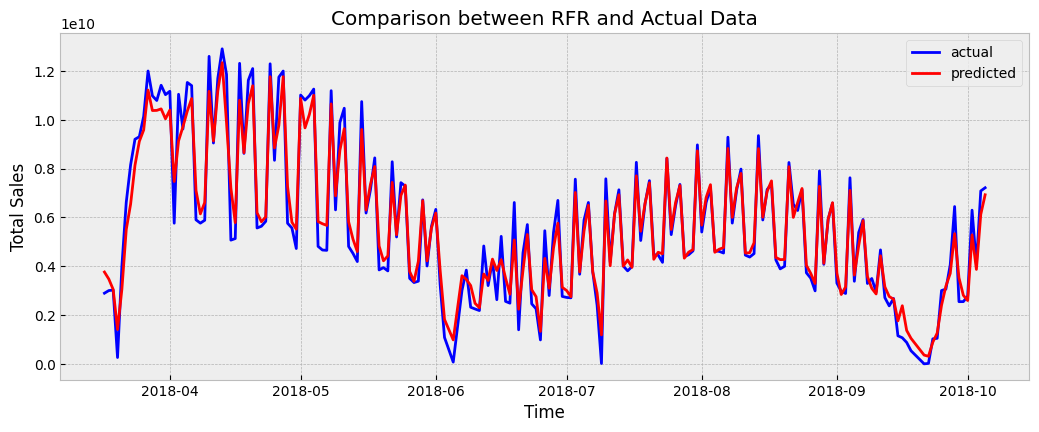

In [ ]:
#visualizng how well the predicted RFR predicted sales fit with the data and the forecasted sales
actual = get_data().iloc[:-30 ]
index_list = actual.index.tolist()
prediction = y_train_pred_RFR
prediction = pd.DataFrame({'prediction': prediction}, index=index_list)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title(f'Comparison between RFR and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(actual.Total_Sales, label = 'actual', color='b' )
plt.plot(prediction, label = 'predicted', color='r' )
plt.legend()

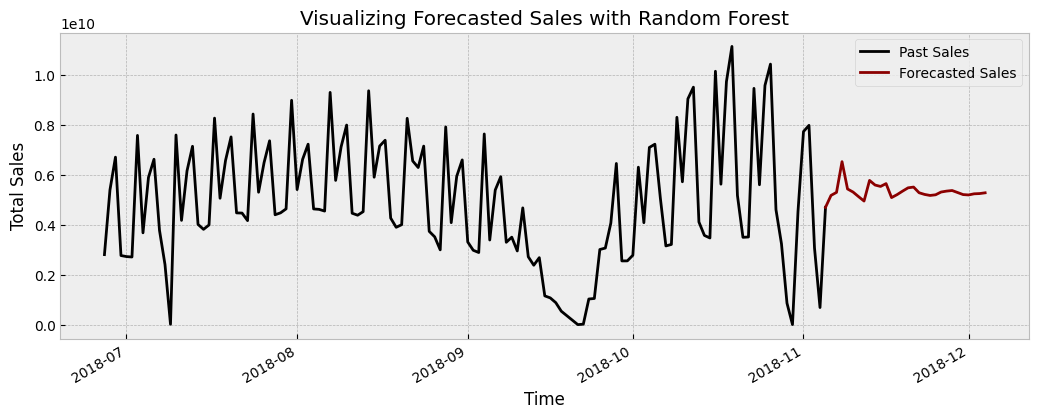

In [ ]:
#We can see that how well the model has fit the data

#visualizing the forecastes sales
df_actual= df2[['Total_Sales']].loc[:forecast_date]
df_forecast = df2['Total_Sales'].loc[forecast_date:]
# df_forecast = df_forecast.rename(columns= {'Total_Sales':'Forecasted'})
forecast_plot(df_actual, df_forecast,'Random Forest')

In [ ]:
#XGBRegressor
df2=get_data()

forecast_date=get_forecast_date(df2)
print(f"{forecast_date}")
x_train, y_train, x_test, y_test = train_test_split(df2, 30)
model_fit,y_train_pred_XGB  = model_train(x_train.values, y_train.values, 'XGB', XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=0))
df2 = model_forecast_n(30, model_fit, df2)
df2

2018-11-05 00:00:00
Using XGB model


,Total_Sales,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,,
2018-03-17,2.895673e+09,4.043242e+09,3.309335e+09,1.870939e+09,1.800000e+05,3.203000e+07
2018-03-18,3.002792e+09,2.895673e+09,4.043242e+09,3.309335e+09,1.870939e+09,1.800000e+05
2018-03-19,3.023950e+09,3.002792e+09,2.895673e+09,4.043242e+09,3.309335e+09,1.870939e+09
2018-03-20,2.596050e+08,3.023950e+09,3.002792e+09,2.895673e+09,4.043242e+09,3.309335e+09
2018-03-21,4.006255e+09,2.596050e+08,3.023950e+09,3.002792e+09,2.895673e+09,4.043242e+09
...,...,...,...,...,...,...
2018-11-30,7.217592e+09,7.395472e+09,7.092399e+09,7.216936e+09,6.796487e+09,6.575806e+09
2018-12-01,6.907874e+09,7.217592e+09,7.395472e+09,7.092399e+09,7.216936e+09,6.796487e+09
2018-12-02,6.758979e+09,6.907874e+09,7.217592e+09,7.395472e+09,7.092399e+09,7.216936e+09


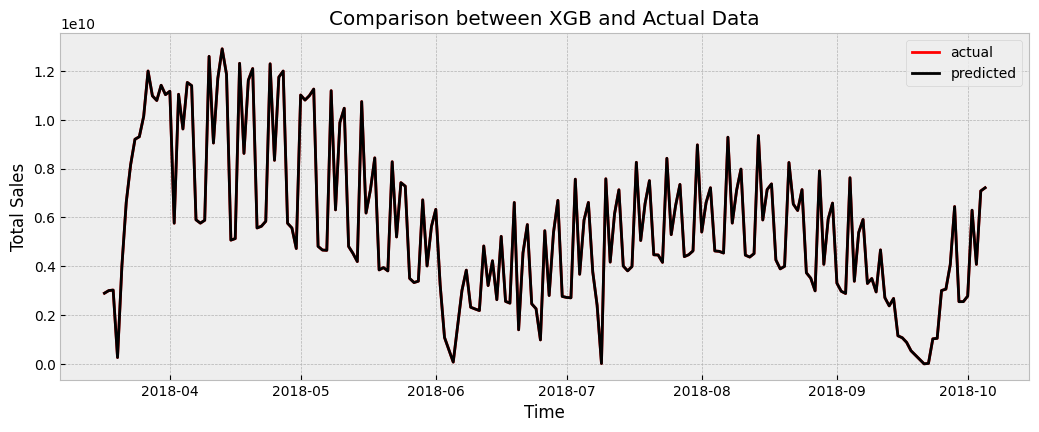

In [ ]:
#visualizng how well the predicted RFR predicted sales fit with the data and the forecasted sales
actual = get_data().iloc[:-30 ]
index_list = actual.index.tolist()
prediction = y_train_pred_XGB
prediction = pd.DataFrame({'prediction': prediction}, index=index_list)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12.5, 4.5)
plt.title(f'Comparison between XGB and Actual Data')
plt.xlabel('Time')
plt.ylabel("Total Sales")

plt.plot(actual.Total_Sales, label = 'actual', color='r' )
plt.plot(prediction, label = 'predicted', color='k' )
plt.legend()


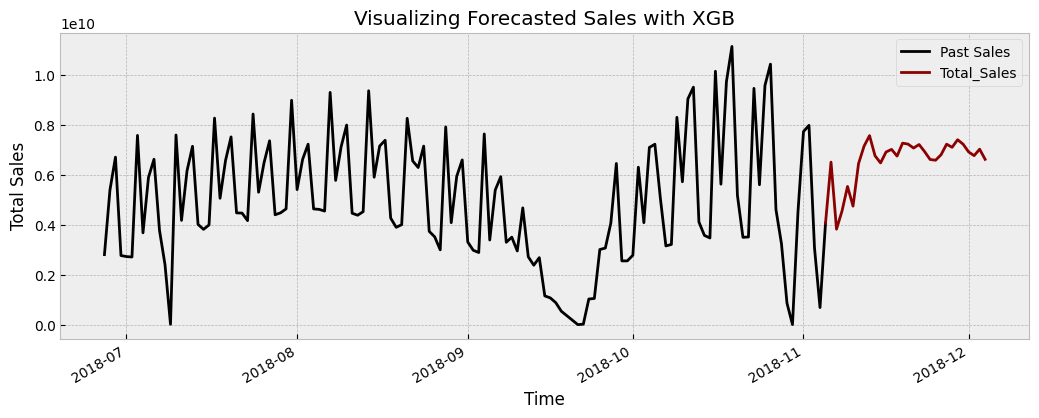

In [ ]:
#visualizing the forecasted sales
df = df2[['Total_Sales']].loc[:forecast_date]
df_forecast = df2[['Total_Sales']].loc[forecast_date:]
forecast_plot(df, df_forecast,'XGB')



In [ ]:
result

,Method,Algorithm,MSE,RMSE,MAE,R2
0,Time Series,Simple Moving Average,1.340669e+19,3.661515e+09,3.179639e+09,-0.387093
1,Time Series,Weighted Moving Average,1.711698e+19,4.137267e+09,3.139920e+09,-0.770970
2,Time Series,ARIMA,7.127937e+18,2.669820e+09,2.131719e+09,0.553647
3,Time Series,SARIMAX,2.195495e+19,4.685610e+09,3.914760e+09,-0.374825
4,Machine Learning,RFR(n_estimators=100),7.716221e+18,2.777809e+09,2.402536e+09,0.201658
5,Machine Learning,RFR(n_estimators=200),7.470949e+18,2.733304e+09,2.339553e+09,0.227035
6,Machine Learning,RFR(n_estimators=300),7.442448e+18,2.728085e+09,2.335873e+09,0.229984
7,Machine Learning,XGBRegressor,7.929780e+18,2.815987e+09,2.313002e+09,0.179563
8,Machine Learning,Linear Regression,9.677848e+18,3.110924e+09,2.918928e+09,-0.001297
